In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Gathering data

In [2]:
data= pd.read_csv('countries of the world.csv')
#creating a copy
data_copy=data

# Data wrangling

## Assessing data

In [3]:
data.sample(5)

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
199,Tajikistan,C.W. OF IND. STATES,7320815,143100,"51,2","0,00","-2,86","110,76",1000.0,"99,4","33,5","6,61","0,92","92,47",2,"32,65","8,25","0,234","0,286","0,48"
132,Mauritania,SUB-SAHARAN AFRICA,3177388,1030700,"3,1","0,07",0,"70,89",1800.0,"41,7","12,9","0,48","0,01","99,51",1,"40,99","12,16","0,25","0,29","0,46"
69,France,WESTERN EUROPE,60876136,547030,"111,3","0,63","0,66","4,26",27600.0,"99,0","586,4","33,53","2,07","64,4",4,"11,99","9,14","0,022","0,214","0,764"
157,Palau,OCEANIA,20579,458,"44,9","331,66","2,85","14,84",9000.0,"92,0","325,6","8,7","4,35","86,95",2,"18,03","6,8","0,062","0,12","0,818"
201,Thailand,ASIA (EX. NEAR EAST),64631595,514000,"125,7","0,63",0,"20,48",7400.0,"92,6","108,9","29,36","6,46","64,18",2,"13,87","7,04","0,099","0,441","0,46"


In [4]:
data_copy=data_copy.rename(columns={'Area (sq. mi.)':'Area', 'Pop. Density (per sq. mi.)': 'Pop_density', 'Coastline (coast/area ratio)': 'Coastline', 'Net migration': 'Migration', 'Infant mortality (per 1000 births)':'Inf_mort','GDP ($ per capita)':'GDP','Literacy (%)':'Literacy','Phones (per 1000)':'Phones','Arable (%)':'Arable','Crops (%)':'Crops', 'Other (%)':'Others'})

In [5]:
data.shape

(227, 20)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227 entries, 0 to 226
Data columns (total 20 columns):
Country                               227 non-null object
Region                                227 non-null object
Population                            227 non-null int64
Area (sq. mi.)                        227 non-null int64
Pop. Density (per sq. mi.)            227 non-null object
Coastline (coast/area ratio)          227 non-null object
Net migration                         224 non-null object
Infant mortality (per 1000 births)    224 non-null object
GDP ($ per capita)                    226 non-null float64
Literacy (%)                          209 non-null object
Phones (per 1000)                     223 non-null object
Arable (%)                            225 non-null object
Crops (%)                             225 non-null object
Other (%)                             225 non-null object
Climate                               205 non-null object
Birthrate                 

In [7]:
data.describe()

,Population,Area (sq. mi.),GDP ($ per capita)
count,2.270000e+02,2.270000e+02,226.000000
mean,2.874028e+07,5.982270e+05,9689.823009
std,1.178913e+08,1.790282e+06,10049.138513
min,7.026000e+03,2.000000e+00,500.000000
25%,4.376240e+05,4.647500e+03,1900.000000
50%,4.786994e+06,8.660000e+04,5550.000000
75%,1.749777e+07,4.418110e+05,15700.000000
max,1.313974e+09,1.707520e+07,55100.000000


In [8]:
data

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,"48,0","0,00","23,06","163,07",700.0,"36,0","3,2","12,13","0,22","87,65",1,"46,6","20,34","0,38","0,24","0,38"
1,Albania,EASTERN EUROPE,3581655,28748,"124,6","1,26","-4,93","21,52",4500.0,"86,5","71,2","21,09","4,42","74,49",3,"15,11","5,22","0,232","0,188","0,579"
2,Algeria,NORTHERN AFRICA,32930091,2381740,"13,8","0,04","-0,39",31,6000.0,"70,0","78,1","3,22","0,25","96,53",1,"17,14","4,61","0,101","0,6","0,298"
3,American Samoa,OCEANIA,57794,199,"290,4","58,29","-20,71","9,27",8000.0,"97,0","259,5",10,15,75,2,"22,46","3,27",NaN,NaN,NaN
4,Andorra,WESTERN EUROPE,71201,468,"152,1","0,00","6,6","4,05",19000.0,"100,0","497,2","2,22",0,"97,78",3,"8,71","6,25",NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
222,West Bank,NEAR EAST,2460492,5860,"419,9","0,00","2,98","19,62",800.0,NaN,"145,2","16,9","18,97","64,13",3,"31,67","3,92","0,09","0,28","0,63"
223,Western Sahara,NORTHERN AFRICA,273008,266000,"1,0","0,42",NaN,NaN,NaN,NaN,NaN,"0,02",0,"99,98",1,NaN,NaN,NaN,NaN,"0,4"
224,Yemen,NEAR EAST,21456188,527970,"40,6","0,36",0,"61,5",800.0,"50,2","37,2","2,78","0,24","96,98",1,"42,89","8,3","0,135","0,472","0,393"
225,Zambia,SUB-SAHARAN AFRICA,11502010,752614,"15,3","0,00",0,"88,29",800.0,"80,6","8,2","7,08","0,03","92,9",2,41,"19,93","0,22","0,29","0,489"


In [9]:
data.duplicated().sum()

0

In [10]:
data.isnull().sum()

Country                                0
Region                                 0
Population                             0
Area (sq. mi.)                         0
Pop. Density (per sq. mi.)             0
Coastline (coast/area ratio)           0
Net migration                          3
Infant mortality (per 1000 births)     3
GDP ($ per capita)                     1
Literacy (%)                          18
Phones (per 1000)                      4
Arable (%)                             2
Crops (%)                              2
Other (%)                              2
Climate                               22
Birthrate                              3
Deathrate                              4
Agriculture                           15
Industry                              16
Service                               15
dtype: int64

### Issues

#### Quality-

- Inaccurate way to store decimal numbers (use of commas instead of decimal points) (Validity)
- Inaccurate datatypes for number values (Validity)



#### Define: Inaccurate way to store decimal numbers (use of commas instead of decimal points) (Validity)
Solution: Replace all commas with dots in the required columns

#### Code

In [11]:
def proper_decimal(a):
    new=[]
    for i in a:
        new.append(str(i).replace(',','.'))
    return new
data_copy['Pop_density']=proper_decimal(data_copy['Pop_density'])
data_copy['Coastline']=proper_decimal(data_copy['Coastline'])
data_copy['Migration']=proper_decimal(data_copy['Migration'])
data_copy['Inf_mort']=proper_decimal(data_copy['Inf_mort'])
data_copy['Literacy']=proper_decimal(data_copy['Literacy'])
data_copy['Phones']=proper_decimal(data_copy['Phones'])
data_copy['Arable']=proper_decimal(data_copy['Arable'])
data_copy['Crops']=proper_decimal(data_copy['Crops'])
data_copy['Others']=proper_decimal(data_copy['Others'])
data_copy['Climate']=proper_decimal(data_copy['Climate'])
data_copy['Birthrate']=proper_decimal(data_copy['Birthrate'])
data_copy['Deathrate']=proper_decimal(data_copy['Deathrate'])
data_copy['Agriculture']=proper_decimal(data_copy['Agriculture'])
data_copy['Industry']=proper_decimal(data_copy['Industry'])
data_copy['Service']=proper_decimal(data_copy['Service'])

In [12]:
data_copy=data_copy.astype({'Pop_density':float,'Coastline':float,'Migration':float,'Inf_mort':float,'Literacy':float,'Phones':float,'Arable':float,'Crops':float,'Others':float,'Climate':float,'Birthrate':float,'Deathrate':float,'Agriculture':float,'Industry':float,'Service':float})
#first converted climate to float type to get numerical NaN values instead of string NaN values; then converting it into a category
data_copy=data_copy.astype({'Climate':'category', 'Country':'category', 'Region':'category'})

#### Test

In [13]:
data_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227 entries, 0 to 226
Data columns (total 20 columns):
Country        227 non-null category
Region         227 non-null category
Population     227 non-null int64
Area           227 non-null int64
Pop_density    227 non-null float64
Coastline      227 non-null float64
Migration      224 non-null float64
Inf_mort       224 non-null float64
GDP            226 non-null float64
Literacy       209 non-null float64
Phones         223 non-null float64
Arable         225 non-null float64
Crops          225 non-null float64
Others         225 non-null float64
Climate        205 non-null category
Birthrate      224 non-null float64
Deathrate      223 non-null float64
Agriculture    212 non-null float64
Industry       211 non-null float64
Service        212 non-null float64
dtypes: category(3), float64(15), int64(2)
memory usage: 43.5 KB


# Re-assessing

In [14]:
data_copy.describe()

,Population,Area,Pop_density,Coastline,Migration,Inf_mort,GDP,Literacy,Phones,Arable,Crops,Others,Birthrate,Deathrate,Agriculture,Industry,Service
count,2.270000e+02,2.270000e+02,227.000000,227.000000,224.000000,224.000000,226.000000,209.000000,223.000000,225.000000,225.000000,225.000000,224.000000,223.000000,212.000000,211.000000,212.000000
mean,2.874028e+07,5.982270e+05,379.047137,21.165330,0.038125,35.506964,9689.823009,82.838278,236.061435,13.797111,4.564222,81.638311,22.114732,9.241345,0.150844,0.282711,0.565283
std,1.178913e+08,1.790282e+06,1660.185825,72.286863,4.889269,35.389899,10049.138513,19.722173,227.991829,13.040402,8.361470,16.140835,11.176716,4.990026,0.146798,0.138272,0.165841
min,7.026000e+03,2.000000e+00,0.000000,0.000000,-20.990000,2.290000,500.000000,17.600000,0.200000,0.000000,0.000000,33.330000,7.290000,2.290000,0.000000,0.020000,0.062000
25%,4.376240e+05,4.647500e+03,29.150000,0.100000,-0.927500,8.150000,1900.000000,70.600000,37.800000,3.220000,0.190000,71.650000,12.672500,5.910000,0.037750,0.193000,0.429250
50%,4.786994e+06,8.660000e+04,78.800000,0.730000,0.000000,21.000000,5550.000000,92.500000,176.200000,10.420000,1.030000,85.700000,18.790000,7.840000,0.099000,0.272000,0.571000
75%,1.749777e+07,4.418110e+05,190.150000,10.345000,0.997500,55.705000,15700.000000,98.000000,389.650000,20.000000,4.440000,95.440000,29.820000,10.605000,0.221000,0.341000,0.678500
max,1.313974e+09,1.707520e+07,16271.500000,870.660000,23.060000,191.190000,55100.000000,100.000000,1035.600000,62.110000,50.680000,100.000000,50.730000,29.740000,0.769000,0.906000,0.954000


In [15]:
data_copy.sample(5)

,Country,Region,Population,Area,Pop_density,Coastline,Migration,Inf_mort,GDP,Literacy,Phones,Arable,Crops,Others,Climate,Birthrate,Deathrate,Agriculture,Industry,Service
213,United Kingdom,WESTERN EUROPE,60609153,244820,247.6,5.08,2.19,5.16,27700.0,99.0,543.5,23.46,0.21,76.33,3.0,10.71,10.13,0.005,0.237,0.758
212,United Arab Emirates,NEAR EAST,2602713,82880,31.4,1.59,1.03,14.51,23200.0,77.9,475.3,0.60,2.25,97.15,1.0,18.96,4.40,0.040,0.585,0.375
148,New Caledonia,OCEANIA,219246,19060,11.5,11.83,0.00,7.72,15000.0,91.0,252.2,0.38,0.33,99.29,2.0,18.11,5.69,0.150,0.088,0.762
50,Croatia,EASTERN EUROPE,4494749,56542,79.5,10.32,1.58,6.84,10600.0,98.5,420.4,26.09,2.27,71.65,NaN,9.61,11.48,0.070,0.308,0.622
26,Botswana,SUB-SAHARAN AFRICA,1639833,600370,2.7,0.00,0.00,54.58,9000.0,79.8,80.5,0.65,0.01,99.34,1.0,23.08,29.50,0.024,0.469,0.507


### Issues

#### Quality-

- Population density has low accuracy (minimum is 0) (Accuracy)
- Region column has all capitals (Consistency)

#### Define: Population density has low accuracy (minimum is 0) (Accuracy)
Solution: Calculate Population density using the formula Total opulation/Area in square km

#### Code

In [16]:
data_copy['Pop_density']=data_copy['Population']/data_copy['Area']

#### Test

In [17]:
data_copy['Pop_density'].describe()

count      227.000000
mean       379.042510
std       1660.187317
min          0.026020
25%         29.157808
50%         78.772786
75%        190.106186
max      16271.500000
Name: Pop_density, dtype: float64

#### Define: Region column has all capitals

#### Code

In [18]:
reg=[]
for i in data_copy['Region']:
    reg.append(i.title().strip())
data_copy['Region']=reg
data_copy=data_copy.astype({'Region':'category'})

#### Test

In [19]:
data_copy['Region'].sample(5)

78           Western Europe
99           Western Europe
5        Sub-Saharan Africa
191    Asia (Ex. Near East)
53           Eastern Europe
Name: Region, dtype: category
Categories (11, object): [Asia (Ex. Near East), Baltics, C.W. Of Ind. States, Eastern Europe, ..., Northern America, Oceania, Sub-Saharan Africa, Western Europe]

In [20]:
data_copy.dtypes

Country        category
Region         category
Population        int64
Area              int64
Pop_density     float64
Coastline       float64
Migration       float64
Inf_mort        float64
GDP             float64
Literacy        float64
Phones          float64
Arable          float64
Crops           float64
Others          float64
Climate        category
Birthrate       float64
Deathrate       float64
Agriculture     float64
Industry        float64
Service         float64
dtype: object

# Univariate analysis

In [21]:
def pdfcdf(x,bins):
    counts, edges=np.histogram(x, bins=bins)
    pdf=counts/sum(counts)
    cdf=np.cumsum(pdf)
    plt.plot(edges[1:],pdf, label='Probabilty Density Function')
    plt.plot(edges[1:],cdf, label='Cumilative Density Function')
    plt.title('Probability and Cumulative density graphs')
    plt.legend(loc="right")

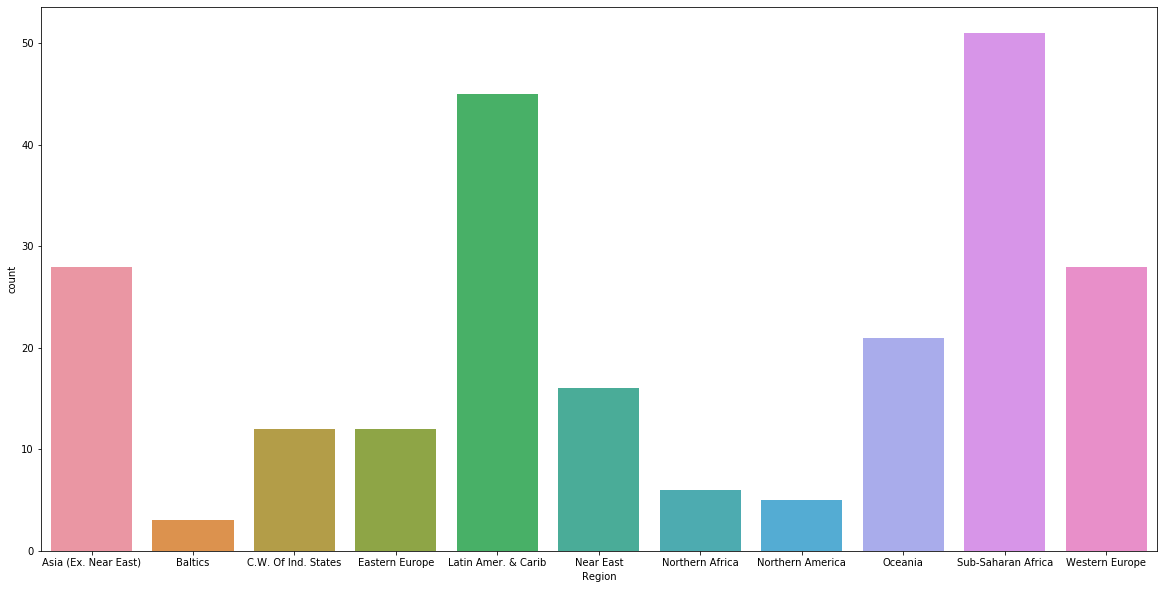

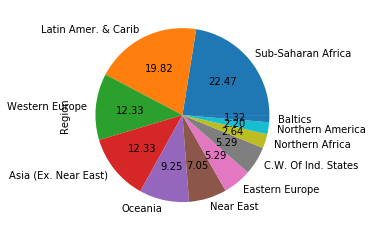

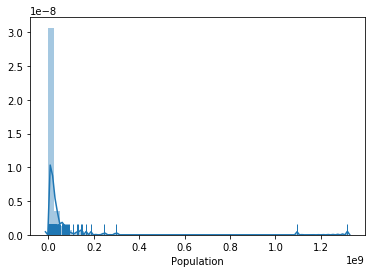

MemoryError: 

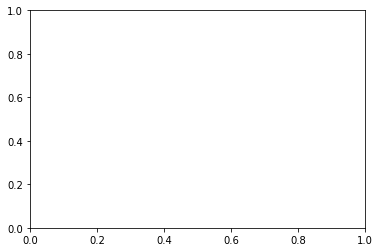

In [59]:
for i in data_copy.columns[1:]:
    if str(data_copy[i].dtype)== 'category':
#         sns.distplot(data_copy[i].dropna())
#         print(i)
        f,ax = plt.subplots(figsize =(20,10))
        sns.countplot(data_copy[i], ax=ax)
        plt.show()
        data_copy[i].value_counts().plot(kind='pie', autopct='%0.2f')
        plt.show()
#         pdfcdf(data_copy[i],len(data_copy[i].unique()))
#         plt.show()
    else:
        sns.distplot(data_copy[i].dropna(), rug=True)
        plt.show()
        pdfcdf(data_copy[i].dropna(),int(data_copy[i].max()/10)+1)
        plt.show()
        sns.boxplot(data_copy[i].dropna())
        plt.show()
        sns.distplot(data_copy[data_copy[i]<data_copy[i].quantile(0.90)][i],rug=True, label='Plot for 90% nations', color='orange')
        plt.legend()
        plt.show()

# Multivariate analysis

## Climate influence

In [23]:
ct=pd.crosstab(data_copy['Climate'],data_copy['Country'])
ct

Country,Afghanistan,Albania,Algeria,American Samoa,Andorra,Anguilla,Antigua & Barbuda,Argentina,Armenia,Aruba,...,Vanuatu,Venezuela,Vietnam,Virgin Islands,Wallis and Futuna,West Bank,Western Sahara,Yemen,Zambia,Zimbabwe
Climate,,,,,,,,,,,,,,,,,,,,,
1.0,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0
1.5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2.0,0,0,0,1,0,1,1,0,0,1,...,1,1,1,1,1,0,0,0,1,1
2.5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3.0,0,1,0,0,1,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
4.0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [24]:
ct=pd.crosstab(data_copy['Climate'],data_copy['Region'])
ct

Region,Asia (Ex. Near East),Baltics,C.W. Of Ind. States,Eastern Europe,Latin Amer. & Carib,Near East,Northern Africa,Northern America,Oceania,Sub-Saharan Africa,Western Europe
Climate,,,,,,,,,,,
1.0,4,0,3,0,0,10,3,1,1,7,0
1.5,1,0,0,0,3,0,0,0,0,4,0
2.0,18,0,1,0,39,0,0,1,19,33,0
2.5,1,0,1,0,0,0,0,0,0,1,0
3.0,3,2,2,8,3,5,1,1,1,3,19
4.0,0,0,3,1,0,0,0,0,0,0,2


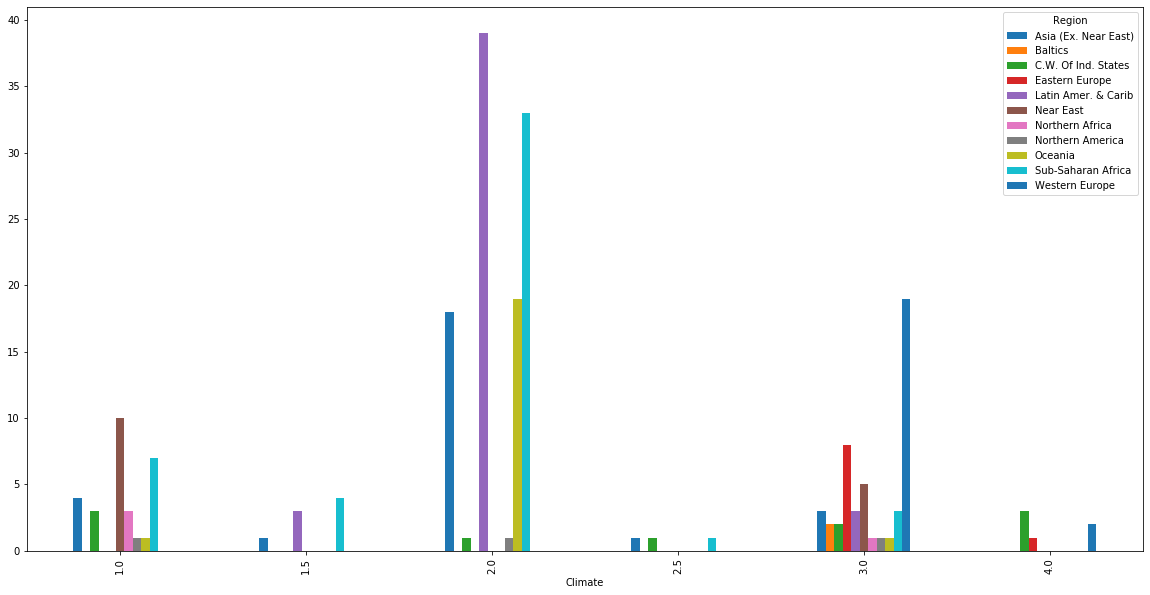

In [25]:
# plt.figure(figsize=(20,10))
ct.plot(kind='bar',figsize=(20,10))

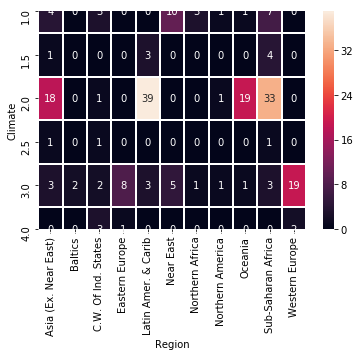

In [26]:
sns.heatmap(ct, linewidth=1, annot=True)

# Geographical properties and their influences

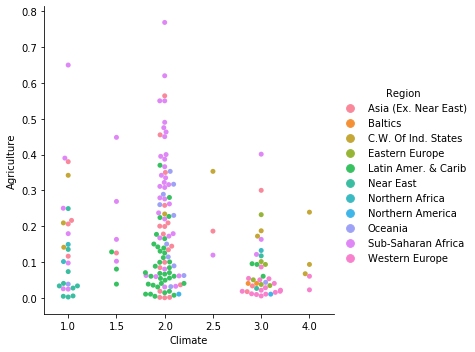

In [27]:
sns.catplot(x='Climate',y='Agriculture', data=data_copy.dropna(), kind='swarm', hue='Region')

### Conclusion:
1. Climate 1.0 has a good yeild in general. Small but multiple agricultural endeavours in Latin America and Caribbean region, higher yeilds in Sub-Saharan Africa and Western europe but small in number.
2. Climate 1.5 is not very common a climate for agriculture and is mainly practiced in sub-saharan regions.
3. CLimate 2.0 is the most common climate for agriculture, with lower numbers in Latin America and very high numbers in sub-saharn region.
4. CLimate 2.5 is the rarest climate to practice agriculture in.
5. Climate 3.0 is the second-best climate supportive of agriculture, with multiple but low numbers in Western Europe.
6. Climate 4.0 is not very supportive of agriculture.

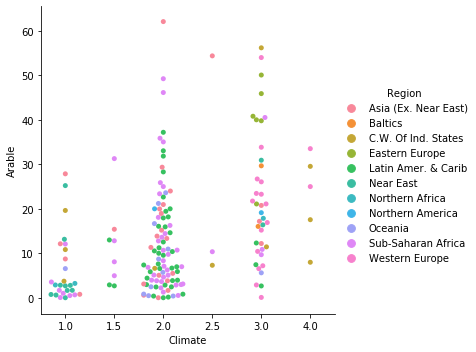

In [28]:
sns.catplot(x='Climate',y='Arable', data=data_copy.dropna(), kind='swarm', hue='Region')

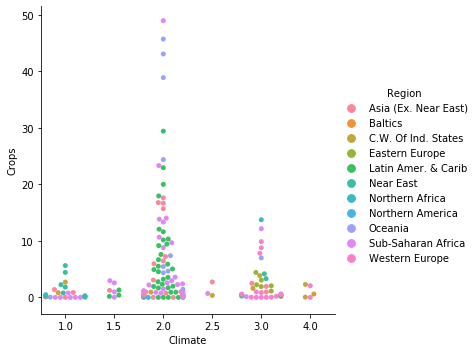

In [29]:
sns.catplot(x='Climate',y='Crops', data=data_copy.dropna(), kind='swarm', hue='Region')

## Conclusion: we can see there is clearly a trend of climate having an influence on agriculture, land usability and crop yeilds

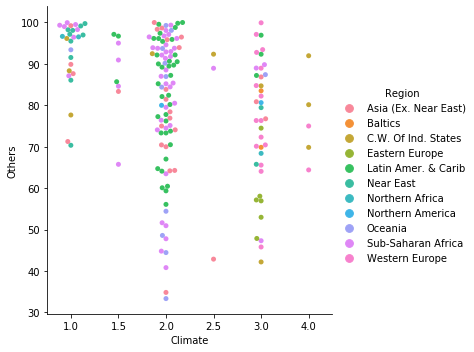

In [30]:
sns.catplot(x='Climate',y='Others', data=data_copy.dropna(), kind='swarm', hue='Region')

## Conclusion: Conversely, there is clearly an inverse relation between climate and good agricultural yeilds and other modes of income. The more the crop yeild, the lesser the reliance on other modes of income.

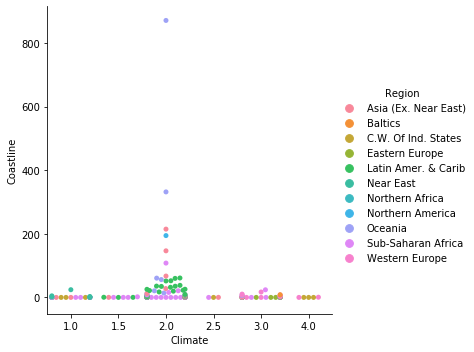

In [31]:
sns.catplot(x='Climate',y='Coastline', data=data_copy.dropna(), kind='swarm', hue='Region')

#### Conclusion: no particular influence in climate because of coastline

# Regions and  People patterns

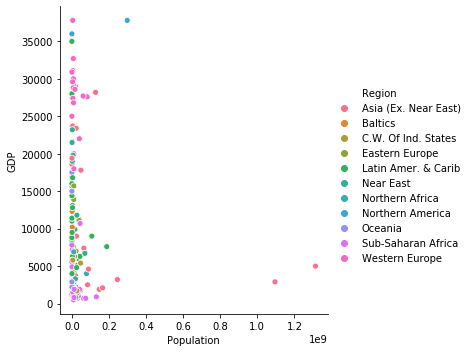

In [32]:
sns.relplot(x='Population',y='GDP', data=data_copy.dropna(), hue='Region')

### Conclusion: Lower population has higher GDP in general. Also, Western european and North American countries are the richest countries

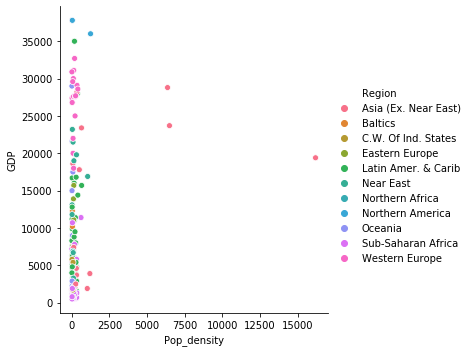

In [33]:
sns.relplot(x='Pop_density',y='GDP', data=data_copy.dropna(), hue='Region')

For 60% of the countries to eliminate outliers

In [34]:
i

'Population'

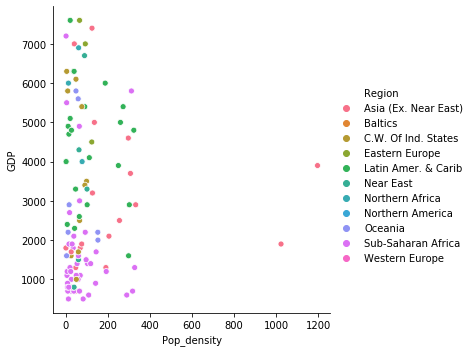

In [35]:
sns.relplot(x='Pop_density',y='GDP', data=data_copy[data_copy['GDP']<data_copy['GDP'].quantile(0.60)].dropna(), hue='Region')

### Conclusion: lower population density results in higher GDP. Also, highest population density is found in asian countries, and lowest GDP is found in sub-saharan countries

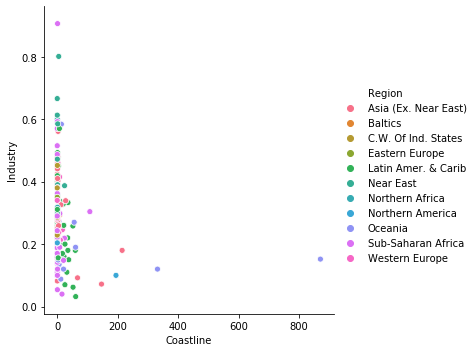

In [36]:
sns.relplot(x='Coastline',y='Industry', data=data_copy.dropna(), hue='Region')

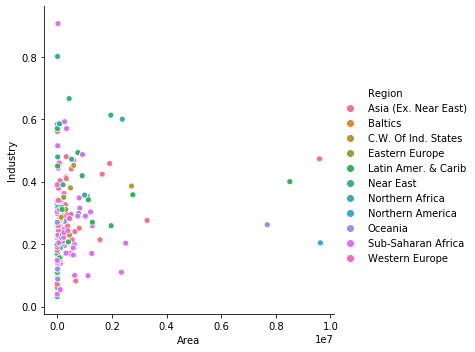

In [37]:
sns.relplot(x='Area',y='Industry', data=data_copy.dropna(), hue='Region')

### Conclusion: We can see industries are independent of coastlines in present times, which shows that historical trends have changed when coastline used to play a huge role in transportation of industry materials. Industries also do not have an affinity for larger areas and can thrive in small areas as well.

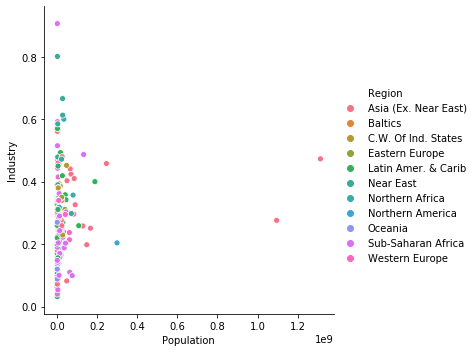

In [38]:
sns.relplot(x='Population',y='Industry', data=data_copy.dropna(), hue='Region')

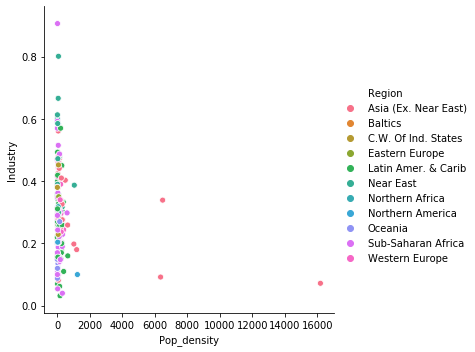

In [39]:
sns.relplot(x='Pop_density',y='Industry', data=data_copy.dropna(), hue='Region')

### Conclusion:  Industry also shows no pattern with population or population density, showing that low labour industires are available as well.

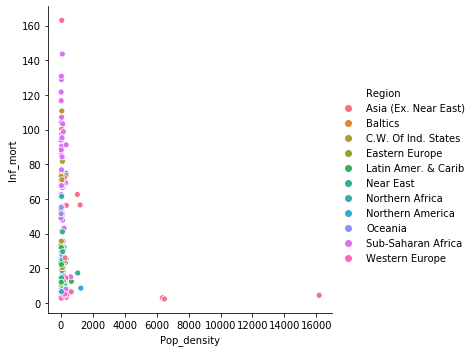

In [40]:
sns.relplot(x='Pop_density',y='Inf_mort', data=data_copy.dropna(), hue='Region')

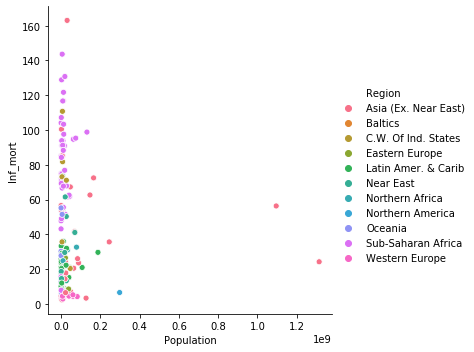

In [41]:
sns.relplot(x='Population',y='Inf_mort', data=data_copy.dropna(), hue='Region')

### Conclusion: No relevance of population or population density with infant mortality. Sub saharan countries have highest infant mortality

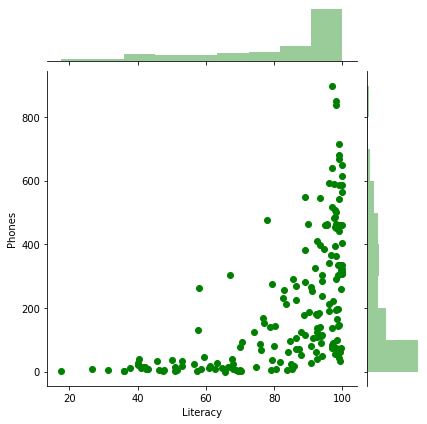

In [42]:
sns.jointplot(x='Literacy',y='Phones', data=data_copy.dropna(), color='green')

### Conclusion: There is a positive correlation between literacy and phones used, showing that literate populations use more phones

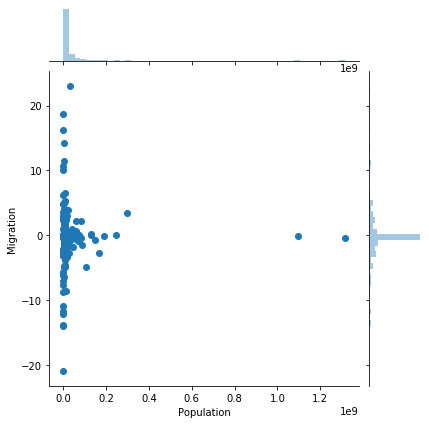

In [43]:
sns.jointplot(x='Population',y='Migration', data=data_copy.dropna())

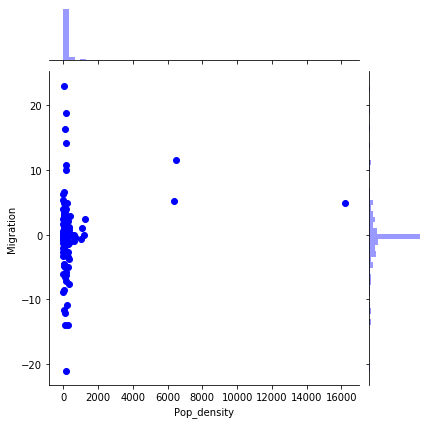

In [44]:
sns.jointplot(x='Pop_density',y='Migration', data=data_copy.dropna(), color='blue')

### Conclusion: No relavance of migration wrt population trends

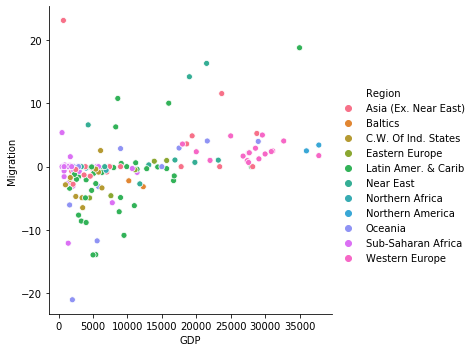

In [45]:
sns.relplot(x='GDP',y='Migration', data=data_copy.dropna(), hue='Region')

### Conclusion: There is a slight positive correlation, showing people prefet to move from lower income regions to higher income regions. People prefer migrating from latin american countries the most and to Western European, North America and Oceania regions

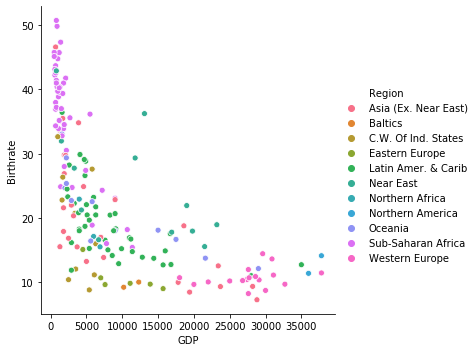

In [46]:
sns.relplot(x='GDP',y='Birthrate', data=data_copy.dropna(), hue='Region')

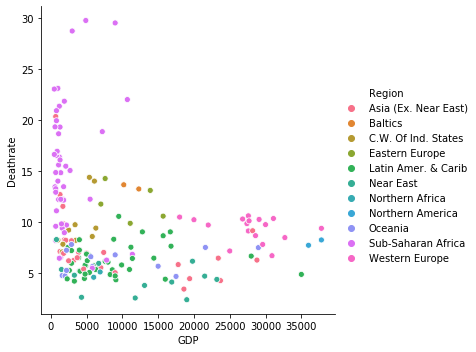

In [47]:
sns.relplot(x='GDP',y='Deathrate', data=data_copy.dropna(), hue='Region')

### Conclusion: A lower GDP shows both high birth and death rates. A higher GDP shows low birth and death rates, showing stable and secure lifestyles. Sub-Saharan countries have the highest Birth and Death rates.

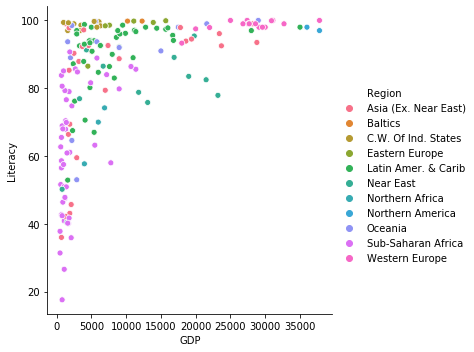

In [48]:
sns.relplot(x='GDP',y='Literacy', data=data_copy.dropna(), hue='Region')

### Conclusion: There is clear positive correlation of literacy rates and GDP. A minimum GDP supports positive and higher literacy rates, but after a certain point the curve flattens as countries with average GDP and high GDP share similar literacy rates

# Occupation influences

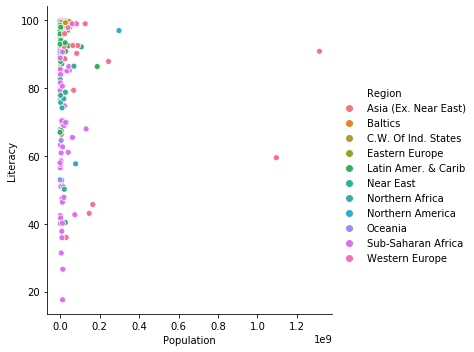

In [49]:
sns.relplot(x='Population',y='Literacy', data=data_copy.dropna(), hue='Region')

#### Conclusion: Independent

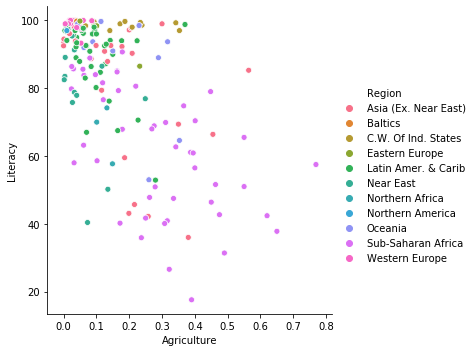

In [50]:
sns.relplot(x='Agriculture',y='Literacy', data=data_copy.dropna(), hue='Region')

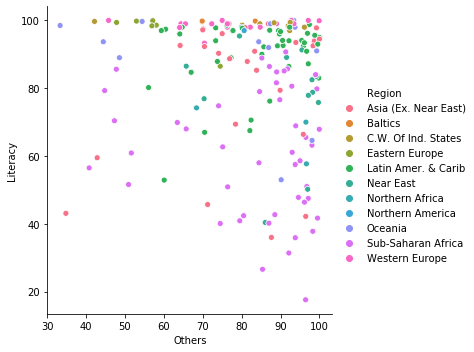

In [51]:
sns.relplot(x='Others',y='Literacy', data=data_copy.dropna(), hue='Region')

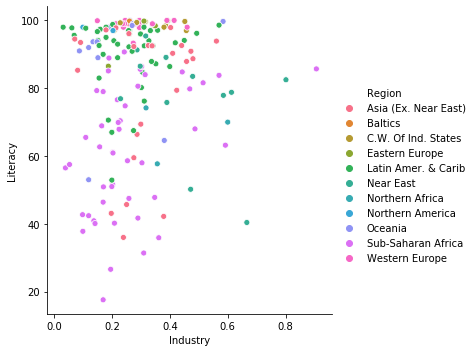

In [52]:
sns.relplot(x='Industry',y='Literacy', data=data_copy.dropna(), hue='Region')

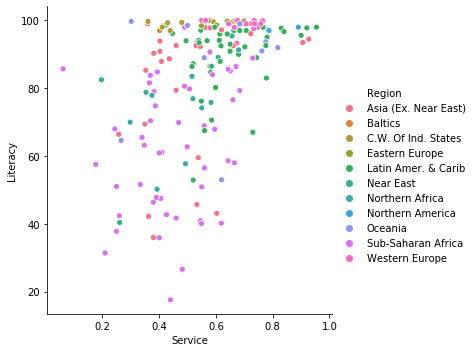

In [53]:
sns.relplot(x='Service',y='Literacy', data=data_copy.dropna(), hue='Region')

### Conclusion: Clear negative correlation of literacy with agriculture, and positive correlation with 'Others' occupation and countries with good industries, relating agriculture as an occupation among low literacy populations and other occupations with higher literacy. Industries also have an affinity towards higher loteracy rate. On the other hand, services is not affected much by literacy rates

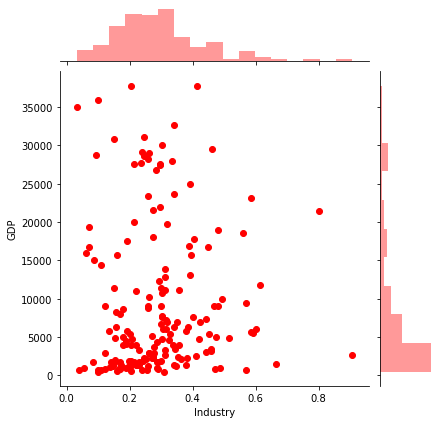

In [54]:
sns.jointplot(x='Industry',y='GDP', data=data_copy.dropna(), color='red')

### Conclusion: Lower GDP means lower number of industries. Yet, a high GDP does not necessarily mean a high number of industries as a country may have different sources of income

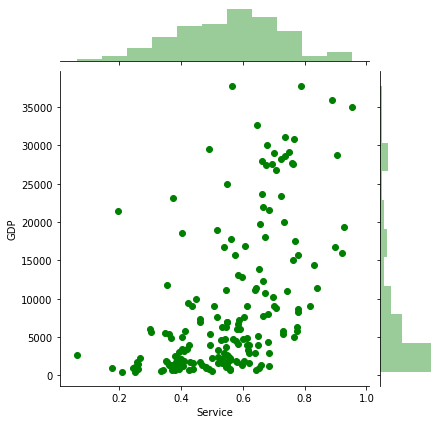

In [55]:
sns.jointplot(x='Service',y='GDP', data=data_copy.dropna(), color='green')

## Conclusion: A low GDP means a low number of services available, however a high GDP shows a higher number of services. There is a clear positive correlation.

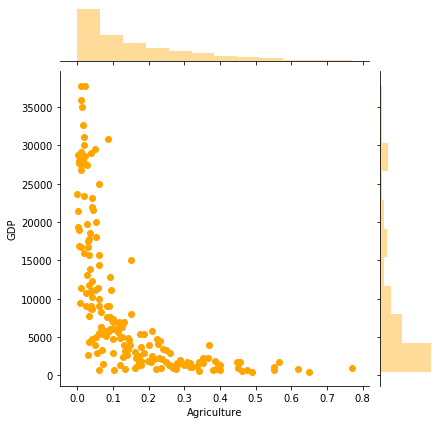

In [56]:
sns.jointplot(x='Agriculture',y='GDP', data=data_copy.dropna(), color='orange')

### Conclusion: There is a negative correlation with agriculture and GDP, showing that poorer countries resort to agriculture more

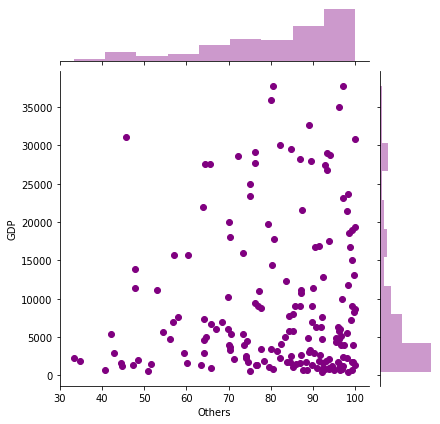

In [57]:
sns.jointplot(x='Others',y='GDP', data=data_copy.dropna(), color='purple')

### Conclusion: There is positive correlation between GDP and Other modes of occupation (other than agriculture)

In [58]:
data_copy

,Country,Region,Population,Area,Pop_density,Coastline,Migration,Inf_mort,GDP,Literacy,Phones,Arable,Crops,Others,Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,Afghanistan,Asia (Ex. Near East),31056997,647500,47.964474,0.00,23.06,163.07,700.0,36.0,3.2,12.13,0.22,87.65,1.0,46.60,20.34,0.380,0.240,0.380
1,Albania,Eastern Europe,3581655,28748,124.587971,1.26,-4.93,21.52,4500.0,86.5,71.2,21.09,4.42,74.49,3.0,15.11,5.22,0.232,0.188,0.579
2,Algeria,Northern Africa,32930091,2381740,13.826065,0.04,-0.39,31.00,6000.0,70.0,78.1,3.22,0.25,96.53,1.0,17.14,4.61,0.101,0.600,0.298
3,American Samoa,Oceania,57794,199,290.422111,58.29,-20.71,9.27,8000.0,97.0,259.5,10.00,15.00,75.00,2.0,22.46,3.27,NaN,NaN,NaN
4,Andorra,Western Europe,71201,468,152.138889,0.00,6.60,4.05,19000.0,100.0,497.2,2.22,0.00,97.78,3.0,8.71,6.25,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
222,West Bank,Near East,2460492,5860,419.879181,0.00,2.98,19.62,800.0,NaN,145.2,16.90,18.97,64.13,3.0,31.67,3.92,0.090,0.280,0.630
223,Western Sahara,Northern Africa,273008,266000,1.026346,0.42,NaN,NaN,NaN,NaN,NaN,0.02,0.00,99.98,1.0,NaN,NaN,NaN,NaN,0.400
224,Yemen,Near East,21456188,527970,40.639029,0.36,0.00,61.50,800.0,50.2,37.2,2.78,0.24,96.98,1.0,42.89,8.30,0.135,0.472,0.393
225,Zambia,Sub-Saharan Africa,11502010,752614,15.282748,0.00,0.00,88.29,800.0,80.6,8.2,7.08,0.03,92.90,2.0,41.00,19.93,0.220,0.290,0.489
